In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv')

In [4]:
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [6]:
df.isnull().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [7]:
# Replace null values with 0 for Latitude and Longitude
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)

In [8]:
# Convert Posted_date to datetime
df['Posted_date'] = pd.to_datetime(df['Posted_date'])

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


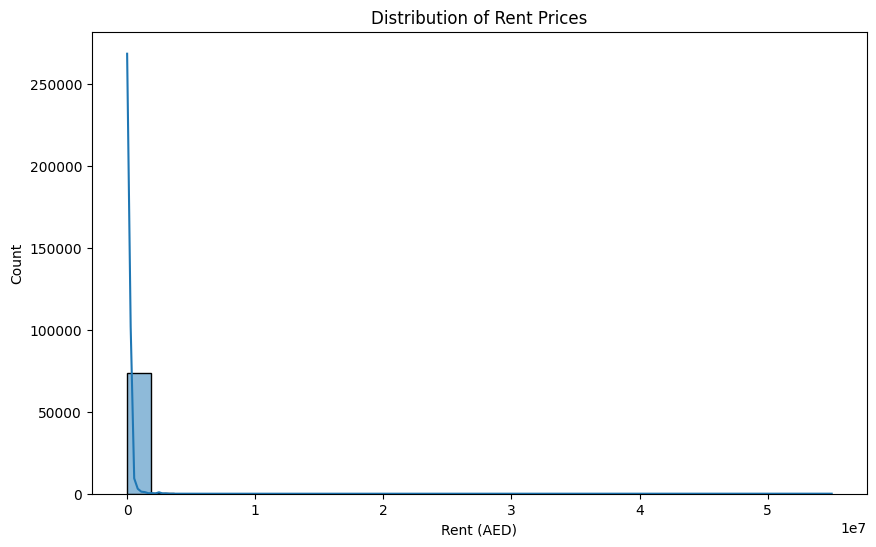

In [9]:
# Distribution of rent prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rent', bins=30, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent (AED)')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


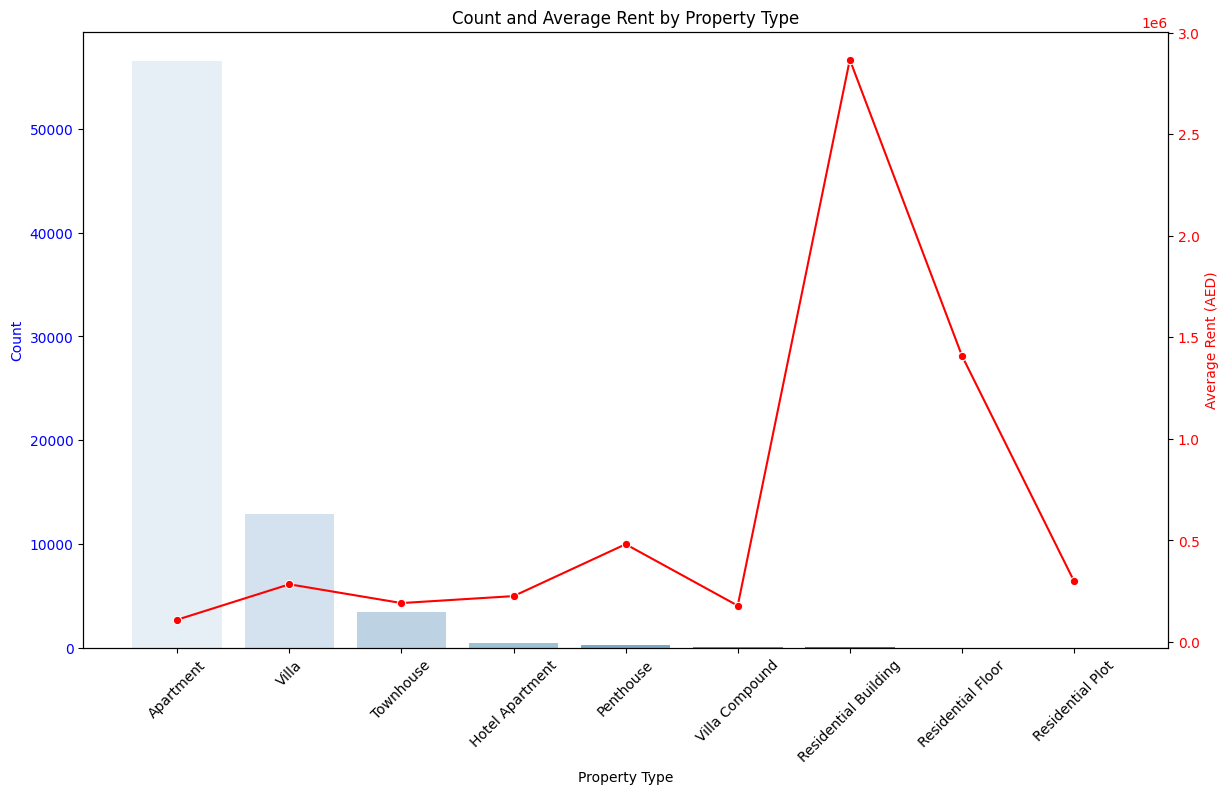

In [10]:
# Calculate the count of different property types
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Calculate the average rent by property type
avg_rent_by_type = df.groupby('Type')['Rent'].mean().reset_index().sort_values(by='Rent', ascending=False)

# Merge the two dataframes
merged_df = pd.merge(type_counts, avg_rent_by_type, on='Type')

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the count of different property types
sns.barplot(data=merged_df, x='Type', y='Count', ax=ax1, palette='Blues')
ax1.set_ylabel('Count', color='blue')
ax1.set_xlabel('Property Type')
ax1.set_title('Count and Average Rent by Property Type')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create a second y-axis for the average rent
ax2 = ax1.twinx()
sns.lineplot(data=merged_df, x='Type', y='Rent', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Rent (AED)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

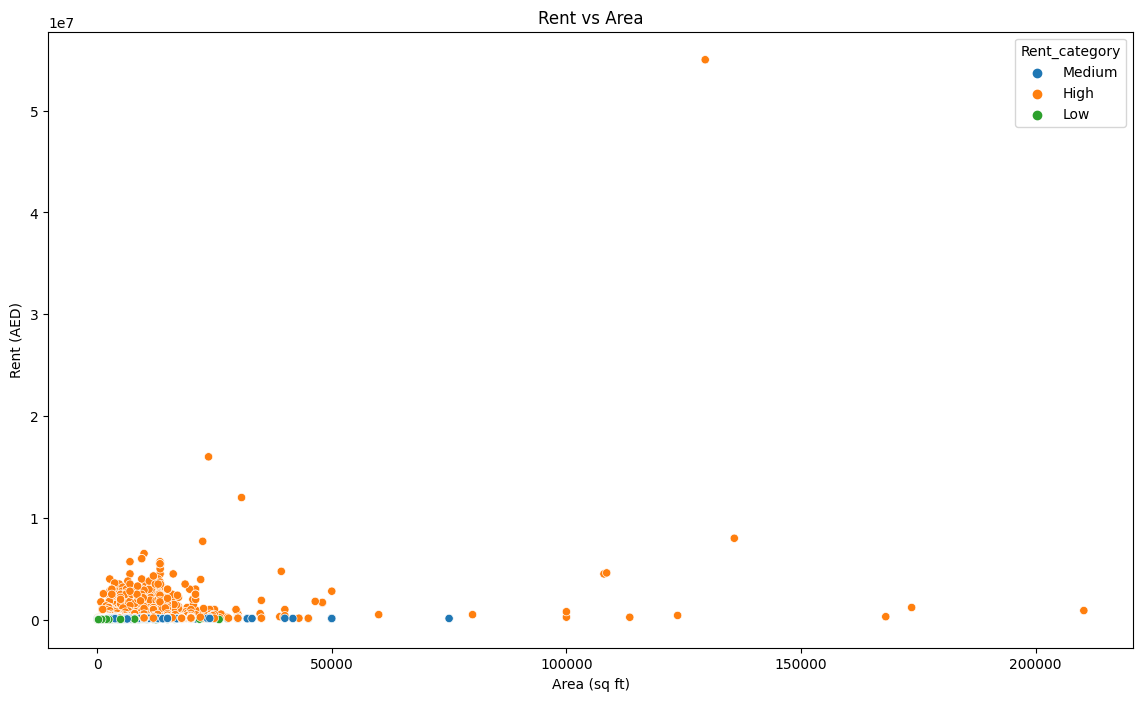

In [11]:
# Scatter plot of rent vs area
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Area_in_sqft', y='Rent', hue='Rent_category')
plt.title('Rent vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Rent (AED)')
plt.show()

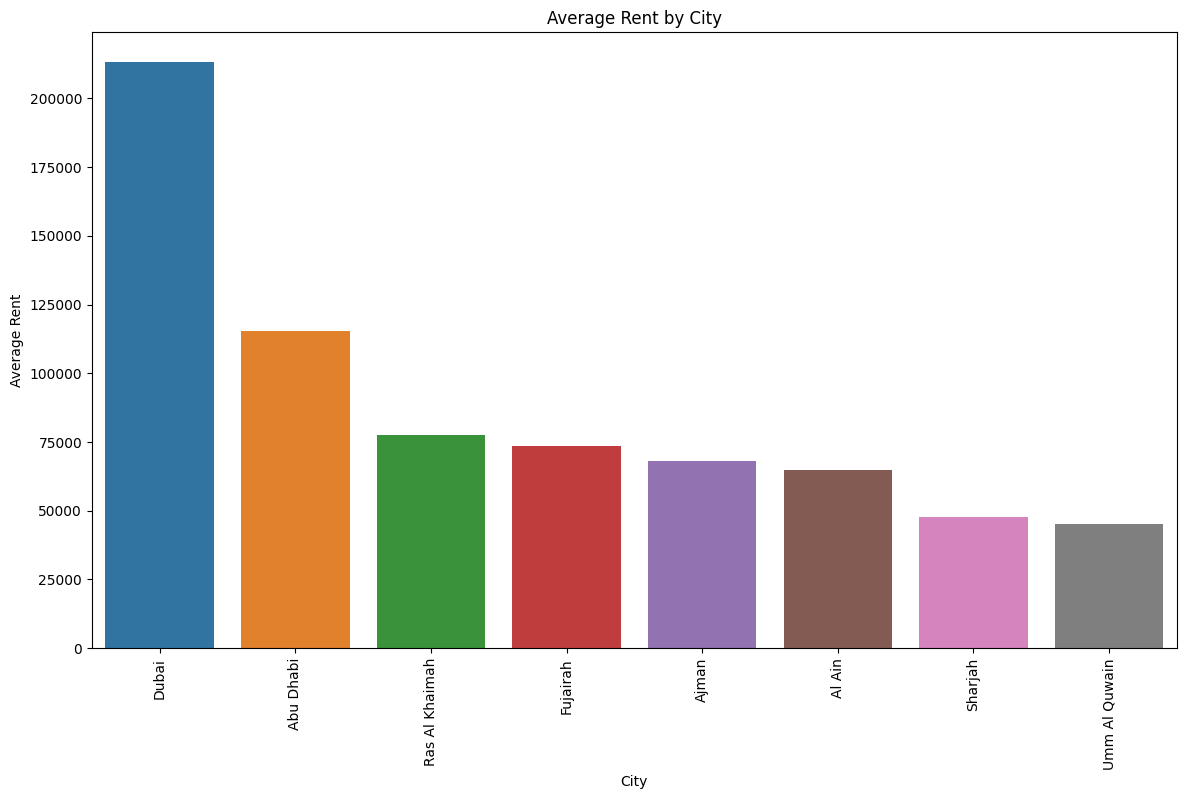

In [12]:
# Bar plot of Rent by City
plt.figure(figsize=(14, 8))
rent_by_city = df.groupby('City')['Rent'].mean().sort_values(ascending=False)
sns.barplot(x=rent_by_city.index, y=rent_by_city.values)
plt.title('Average Rent by City')
plt.xlabel('City')
plt.ylabel('Average Rent')
plt.xticks(rotation=90)
plt.show()

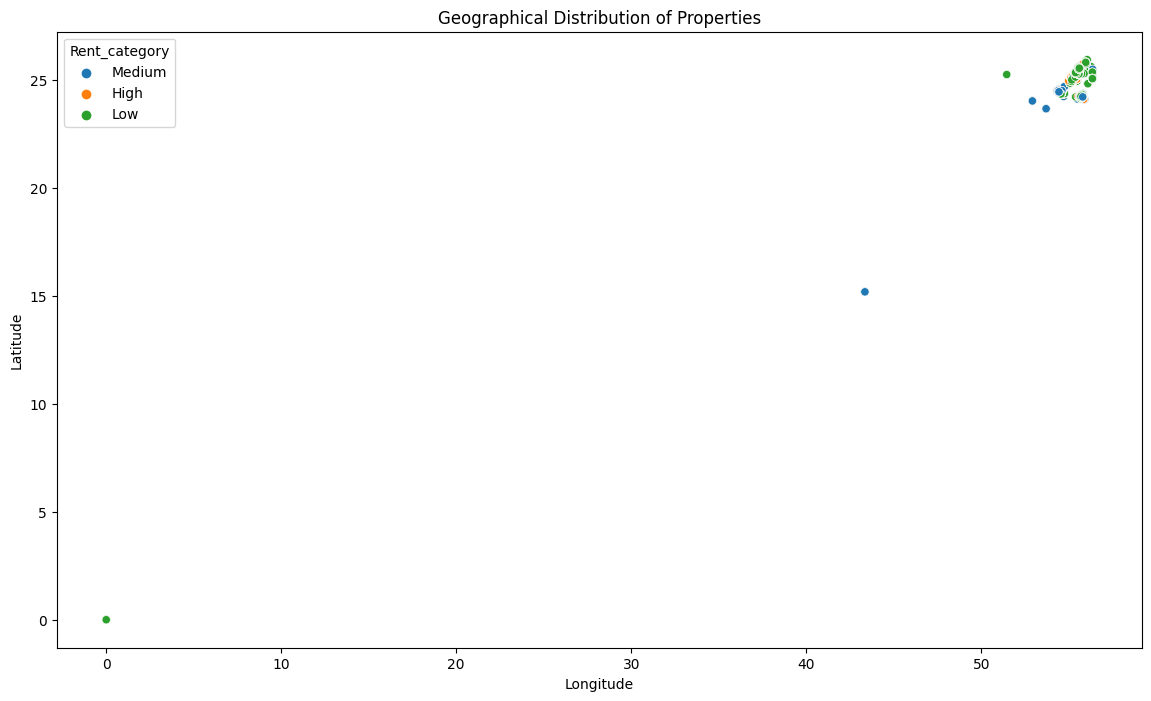

In [13]:
# Geographical distribution of properties
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Rent_category')
plt.title('Geographical Distribution of Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()